In [1]:
import pandas as pd
import numpy as np #used for mathematical functions.
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib
%matplotlib inline
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [2]:
Sales = pd.read_excel('produce_sales.xlsx')

In [3]:
Sales

,month,sales
0,2018-02-07,226.0
1,2018-02-08,185.9
2,2018-02-09,145.9
3,2018-02-10,315.9
4,2018-02-11,122.9
...,...,...
995,2020-10-29,287.0
996,2020-10-30,149.5
997,2020-10-31,224.5
998,2020-11-01,122.9


In [4]:
Sales.shape

(1000, 2)

In [5]:
Sales.describe()

,sales
count,1000.000000
mean,314.342900
std,148.267289
min,119.300000
25%,191.400000
50%,287.000000
75%,421.600000
max,682.000000


In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   1000 non-null   datetime64[ns]
 1   sales   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [ ]:
Sales.isna().sum()

month    0
sales    0
dtype: int64

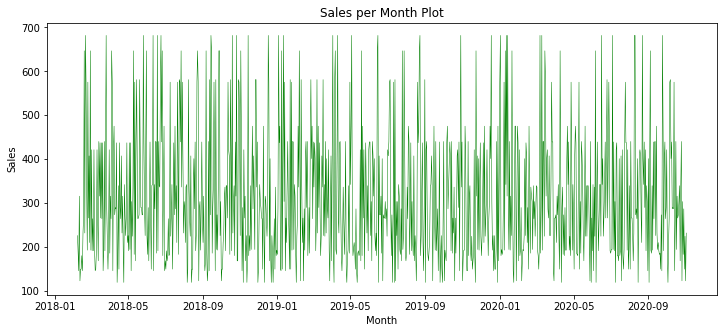

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(Sales['month'], Sales["sales"], linewidth = 0.5, color='g')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title("Sales per Month Plot");

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#X_train

In [30]:
train = Sales.sample(frac=0.75,random_state=0)
test = Sales.drop(train.index)

In [31]:
X = train.month
print(X.shape)

    
y = train.sales
print(y.shape)

(750,)
(750,)


In [32]:
train.head()

,month,sales
993,2020-10-27,303.6
859,2020-06-15,224.5
298,2018-12-02,266.0
553,2019-08-14,168.5
672,2019-12-11,421.6


In [33]:
test.head()

,month,sales
9,2018-02-16,231.8
11,2018-02-18,646.9
19,2018-02-26,407.6
23,2018-03-02,421.6
24,2018-03-03,191.4


In [34]:
def prepare_data(timeseries_data3, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data3)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data3)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data3[i:end_ix], timeseries_data3[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [35]:
test

,month,sales
9,2018-02-16,231.8
11,2018-02-18,646.9
19,2018-02-26,407.6
23,2018-03-02,421.6
24,2018-03-03,191.4
...,...,...
974,2020-10-08,401.3
976,2020-10-10,287.0
980,2020-10-14,145.9
983,2020-10-17,194.3


In [13]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   1000 non-null   datetime64[ns]
 1   sales   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 993 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   750 non-null    datetime64[ns]
 1   sales   750 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.6 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 9 to 994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   250 non-null    datetime64[ns]
 1   sales   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [36]:
timeseries_data3 = np.array(test['sales'])

In [37]:
n_steps = 7

In [38]:
X,y= prepare_data(timeseries_data3, n_steps)

In [39]:
print(X), print(y)

[[231.8 646.9 407.6 ... 191.4 264.5 192.8]
 [646.9 407.6 421.6 ... 264.5 192.8 421.6]
 [407.6 421.6 191.4 ... 192.8 421.6 315.9]
 ...
 [226.  475.3 191.4 ... 289.9 401.3 287. ]
 [475.3 191.4 264.5 ... 401.3 287.  145.9]
 [191.4 264.5 289.9 ... 287.  145.9 194.3]]
[421.6 315.9 437.4 145.9 191.4 682.  185.9 575.5 145.9 339.7 289.9 407.6
 266.  210.1 191.4 194.3 437.4 336.5 575.5 168.5 401.3 264.5 289.9 226.
 183.1 168.5 439.3 149.5 342.3 440.4 439.3 185.9 682.  439.3 646.9 145.9
 168.5 180.3 264.5 183.1 575.5 183.1 439.3 231.8 210.1 119.3 581.3 339.7
 264.5 287.  646.9 303.6 287.  315.9 145.9 194.3 145.9 145.9 581.3 194.3
 226.  339.7 421.6 303.6 339.7 315.9 575.5 439.3 421.6 266.  315.9 226.
 682.  339.7 475.3 287.  194.3 581.3 119.3 475.3 119.3 575.5 119.3 264.5
 149.5 180.3 183.1 646.9 581.3 119.3 342.3 266.  122.9 192.8 440.4 185.9
 581.3 439.3 336.5 289.9 289.9 289.9 266.  119.3 646.9 437.4 440.4 183.1
 119.3 192.8 339.7 342.3 682.  119.3 191.4 421.6 266.  289.9 315.9 226.
 287.  40

(None, None)

In [40]:
X.shape

(243, 7)

Reshape into three dimention, [sample, timesteps, features]

In [41]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### **Activation Process**

In [42]:
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 9ms/step - loss: 124212.3672
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 117073.7266
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 100583.5469
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 47350.9844
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 27162.4395
Epoch 6/200
8/8 [==============================] - 0s 13ms/step - loss: 27153.6465
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 25076.3184
Epoch 8/200
8/8 [==============================] - 0s 10ms/step - loss: 25030.4473
Epoch 9/200
8/8 [==============================] - 0s 10ms/step - loss: 24380.3477
Epoch 10/200
8/8 [==============================] - 0s 11ms/step - loss: 23090.9902
Epoch 11/200
8/8 [==============================] - 0s 9ms/step - loss: 22306.5605
Epoch 12/200
8/8 [==============================] - 0s 10ms/step - loss: 21289.2148


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 64)             16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [44]:
timeseries_data3

array([231.8, 646.9, 407.6, 421.6, 191.4, 264.5, 192.8, 421.6, 315.9,
       437.4, 145.9, 191.4, 682. , 185.9, 575.5, 145.9, 339.7, 289.9,
       407.6, 266. , 210.1, 191.4, 194.3, 437.4, 336.5, 575.5, 168.5,
       401.3, 264.5, 289.9, 226. , 183.1, 168.5, 439.3, 149.5, 342.3,
       440.4, 439.3, 185.9, 682. , 439.3, 646.9, 145.9, 168.5, 180.3,
       264.5, 183.1, 575.5, 183.1, 439.3, 231.8, 210.1, 119.3, 581.3,
       339.7, 264.5, 287. , 646.9, 303.6, 287. , 315.9, 145.9, 194.3,
       145.9, 145.9, 581.3, 194.3, 226. , 339.7, 421.6, 303.6, 339.7,
       315.9, 575.5, 439.3, 421.6, 266. , 315.9, 226. , 682. , 339.7,
       475.3, 287. , 194.3, 581.3, 119.3, 475.3, 119.3, 575.5, 119.3,
       264.5, 149.5, 180.3, 183.1, 646.9, 581.3, 119.3, 342.3, 266. ,
       122.9, 192.8, 440.4, 185.9, 581.3, 439.3, 336.5, 289.9, 289.9,
       289.9, 266. , 119.3, 646.9, 437.4, 440.4, 183.1, 119.3, 192.8,
       339.7, 342.3, 682. , 119.3, 191.4, 421.6, 266. , 289.9, 315.9,
       226. , 287. ,

### **LSTM model training**

In [45]:
# demonstrate prediction for next 300 days
x_input = np.array([191.4, 264.5, 289.9, 401.3, 287., 145.9, 194.3])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<300):
    
    if(len(temp_input)>7):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[402.80984]
1 day input [264.5        289.9        401.3        287.         145.9
 194.3        402.80984497]
1 day output [[387.52686]]
2 day input [289.9        401.3        287.         145.9        194.3
 402.80984497 387.52685547]
2 day output [[321.9786]]
3 day input [401.3        287.         145.9        194.3        402.80984497
 387.52685547 321.97860718]
3 day output [[399.02377]]
4 day input [287.         145.9        194.3        402.80984497 387.52685547
 321.97860718 399.02377319]
4 day output [[449.7436]]
5 day input [145.9        194.3        402.80984497 387.52685547 321.97860718
 399.02377319 449.74359131]
5 day output [[374.12247]]
6 day input [194.3        402.80984497 387.52685547 321.97860718 399.02377319
 449.74359131 374.12246704]
6 day output [[358.4745]]
7 day input [402.80984 387.52686 321.9786  399.02377 449.7436  374.12247 358.4745 ]
7 day output [[427.1588]]
8 day input [387.52686 321.9786  399.02377 449.7436  374.12247 358.4745  427.1588 ]
8 day output 

In [46]:
len(timeseries_data3)

250

In [47]:
lst_output

[402.80984,
 387.52686,
 321.9786,
 399.02377,
 449.7436,
 374.12247,
 358.4745,
 427.1588,
 465.93286,
 444.9278,
 454.83875,
 388.932,
 415.19836,
 443.97726,
 544.48505,
 545.0769,
 527.52625,
 393.23648,
 457.97363,
 460.44232,
 540.7981,
 642.4163,
 603.7772,
 421.37082,
 477.3032,
 389.7762,
 484.76056,
 580.63055,
 657.80286,
 423.70517,
 502.12317,
 409.6873,
 460.61026,
 519.5954,
 860.6864,
 453.11063,
 468.70554,
 446.88013,
 316.30652,
 509.96973,
 581.2736,
 418.30334,
 453.523,
 368.05396,
 488.00522,
 557.00604,
 479.40445,
 409.3608,
 474.8938,
 466.3798,
 479.0761,
 532.20905,
 539.2325,
 408.8549,
 520.52716,
 495.51132,
 503.80432,
 519.5563,
 551.13556,
 427.95355,
 512.16675,
 531.5788,
 536.709,
 576.1562,
 568.50903,
 439.49478,
 436.5739,
 595.62933,
 568.5904,
 579.90063,
 490.92926,
 436.04654,
 482.3813,
 566.1334,
 610.2203,
 481.9871,
 585.8185,
 405.98413,
 458.03018,
 536.02185,
 612.41754,
 527.0929,
 462.35898,
 428.8098,
 456.75058,
 507.2279,
 578.737

In [76]:
day_new=np.arange(1,251)
day_pred=np.arange(250,550);

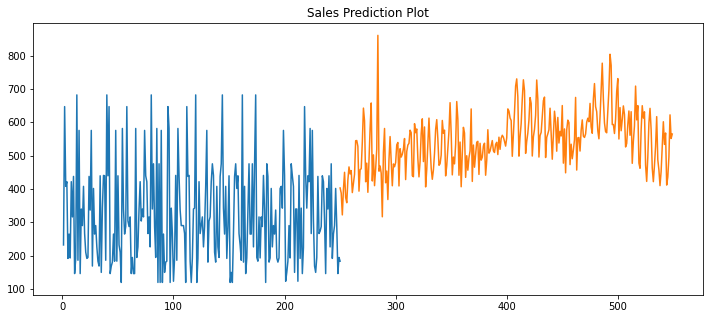

In [77]:
plt.figure(figsize=(12, 5))
plt.plot(day_new,timeseries_data3)
plt.plot(day_pred,lst_output)
plt.title("Sales Prediction Plot");
plt.show()

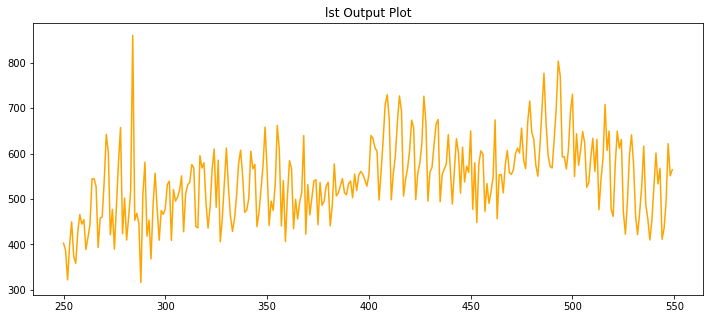

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(day_pred,lst_output, color='orange')
plt.title("lst Output Plot");
plt.show()